### Candidate Number: 640844 

# Machine Learning for Business Analytics- UK Road Safety Dataset (Individual assignment) 
In the group work submission, we carried out Data Preprocessing and Explorary Data Analysis report on the UK Road Safety dataset. 

In my individual submission, I will create several models to predict the casualty serverity based on
independent variables selected.


#### Table of Contents
1. Introduction: Business Context and Objective
2. Data Loading and Selection
3. Model Building
4. Model Evaluation
5. Conclusion and Discussion of Results
6. Possible Future Improvements and Business Scenarios for Model Implementation in real-world


## 1. Introduction: Business Context and Objective
### Improving Casualty Severity Prediction and Response in the Health Sector
In the health sector, one of the primary objectives is to reduce fatalities and severe injuries from road accidents while improving the quality of care for casualties. Accurate and timely prediction of casualty severity can significantly enhance emergency response, allocate resources more effectively, and provide data-driven insights for preventative measures. 

The current challenges in the health sector revolve around insufficient real-time data on casualty severity, which limits emergency response effectiveness, resource allocation, and subsequent medical interventions. Inadequate prediction models can lead to delays in providing appropriate treatment, with a high cost in terms of lives and hospital resources. There is an urgent need for advanced predictive models that integrate variables related to road accidents to predict casualty severity effectively.

The objective of this initiative is to build a robust predictive model for casualty severity, with the following goals:

* Predict Casualty Severity: Accurately predict the severity of casualties in road accidents based on various factors.
 * Enhance Emergency Response: Provide emergency teams with valuable insights for optimal resource allocation and prioritisation.
* Improve Health Outcomes: Tailor medical interventions to the severity of the injury, improving survival rates and recovery times.
* Data-Driven Policy Recommendations: Generate data-driven insights for policymakers to create better road safety policies.

### Importing Libraries and Preparing the Environment

In [1]:
#Base Libraries

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from phik.report import plot_correlation_matrix
from scipy.stats import chi2_contingency
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
    
# Library for plotting
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline


# Library for dumping models to files
import os
from joblib import dump

# Library for execution time
import time
from timeit import default_timer as timer
from datetime import timedelta

# Disable all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# To monitor the time it takes to run the notebook
startnb = time.time()

## 2. Data Loading and Selection

In the group submission, we created two dataframes, that is, the train dataset and test dataset.


## 2.1 Data Loading

In [3]:
trainset = pd.read_excel('trainset.xlsx')

testset = pd.read_excel('testset.xlsx')

In [4]:
trainset.info() #Verify dataset structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9257 entries, 0 to 9256
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   vehicle_type                      9257 non-null   object 
 1   towing_and_articulation           9257 non-null   object 
 2   vehicle_manoeuvre                 9257 non-null   object 
 3   vehicle_location_restricted_lane  9257 non-null   object 
 4   junction_location                 9257 non-null   object 
 5   skidding_and_overturning          9257 non-null   object 
 6   hit_object_in_carriageway         9257 non-null   object 
 7   vehicle_leaving_carriageway       9257 non-null   object 
 8   hit_object_off_carriageway        9257 non-null   object 
 9   first_point_of_impact             9257 non-null   object 
 10  vehicle_left_hand_drive           9257 non-null   object 
 11  journey_purpose_of_driver         9257 non-null   object 
 12  sex_of

In [5]:
trainset.head() # Display the first 5 rows of the training dataset to preview the data structure and content

,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,...,driver_imd_decile,driver_home_area_type,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,casualty_home_area_type
0,Motorcycle 125cc and under,No tow/articulation,Going ahead other,On main c'way - not in restricted lane,Not at or within 20 metres of junction,Overturned,None,Did not leave carriageway,None,Front,...,More deprived 40-50%,Urban area,Pedestrian,Male,21 - 25,Slight,On footway or verge,Unknown or other,Not car passenger,Small town
1,Pedal cycle,unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),Front,...,More deprived 30-40%,Urban area,Driver or rider,Male,36 - 45,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Urban area
2,Car,No tow/articulation,unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),...,Less deprived 10-20%,Urban area,Pedestrian,Male,46 - 55,Slight,"In carriageway, crossing elsewhere",Crossing from driver's nearside,Not car passenger,Urban area
3,Car,No tow/articulation,unknown (self reported),unknown (self reported),Not at or within 20 metres of junction,unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),Back,...,Less deprived 40-50%,Urban area,Pedestrian,Male,46 - 55,Slight,"In carriageway, crossing elsewhere",Crossing from driver's nearside,Not car passenger,Urban area
4,Car,No tow/articulation,unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),unknown (self reported),Back,...,Less deprived 40-50%,Urban area,Pedestrian,Female,Over 75,Slight,"In centre of carriageway - not on refuge, isla...",Crossing from driver's nearside,Not car passenger,Urban area


In [6]:
trainset.shape # Returns the dimensions of the training dataset.

(9257, 28)

The training dataset has 9,257 rows and 28 columns

In [7]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   vehicle_type                      1029 non-null   object 
 1   towing_and_articulation           1029 non-null   object 
 2   vehicle_manoeuvre                 1029 non-null   object 
 3   vehicle_location_restricted_lane  1029 non-null   object 
 4   junction_location                 1029 non-null   object 
 5   skidding_and_overturning          1029 non-null   object 
 6   hit_object_in_carriageway         1029 non-null   object 
 7   vehicle_leaving_carriageway       1029 non-null   object 
 8   hit_object_off_carriageway        1029 non-null   object 
 9   first_point_of_impact             1029 non-null   object 
 10  vehicle_left_hand_drive           1029 non-null   object 
 11  journey_purpose_of_driver         1029 non-null   object 
 12  sex_of

## 2.2 Variables selection

In [8]:
# Define the target variable
target_variable = 'casualty_severity'

In [9]:
df = trainset
# Categorical columns (excluding target variable)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns = [col for col in categorical_columns if col != target_variable]
# Chi-Square test
results = []
for column in categorical_columns:
 contingency_table = pd.crosstab(df[target_variable], df[column])
 chi2, p_value, dof, expected = chi2_contingency(contingency_table)
 results.append({
 'Column': column,
 'Chi-square Statistic': chi2,
 'P-value': f"{p_value:.2f}"
 })
results_df = pd.DataFrame(results)
sorted_results_df = results_df.sort_values('P-value').reset_index(drop=True)
# Phi-K correlation matrix
phik_matrix = df.phik_matrix()
# Extract Phi-K values for the target variable
phik_target = phik_matrix[target_variable].drop(target_variable).reset_index()
phik_target.columns = ['Column', 'Phi-K Correlation']
# Merge Chi-Square results with Phi-K results
final_results = sorted_results_df.merge(phik_target, on='Column')
final_results

interval columns not set, guessing: ['engine_capacity_cc', 'age_of_vehicle']


,Column,Chi-square Statistic,P-value,Phi-K Correlation
0,casualty_home_area_type,48.241579,0.00,0.160062
1,pedestrian_movement,1223.185911,0.00,0.321204
2,vehicle_location_restricted_lane,122.054637,0.00,0.127945
3,pedestrian_location,2385.717763,0.00,0.490737
4,age_band_of_casualty,3026.455370,0.00,0.569852
5,sex_of_casualty,154.502187,0.00,0.077430
6,casualty_class,535.575403,0.00,0.442660
7,car_passenger,94.151361,0.00,0.073284
8,junction_location,25.294465,0.12,0.033661
9,first_point_of_impact,14.882586,0.14,0.039558


Based on the Chi-square Statistic indicating overall association strength, P-value reflecting statistical significance, and Phi-K Correlation serving as an effect size measure, I selected the first 10 variables to proceed with analysis:

1. **casualty_home_area_type**
2. **pedestrian_movement**
3. **vehicle_location_restricted_lane**
4. **pedestrian_location**
5. **age_band_of_casualty**
6. **sex_of_casualty**
7. **casualty_class**
8. **car_passenger**
9. **junction_location**
10. **first_point_of_impact**

In [10]:
# Define the selected features
trainset = trainset.loc[:,[  'casualty_home_area_type',
    'pedestrian_movement',
    'vehicle_location_restricted_lane',
    'pedestrian_location',
    'age_band_of_casualty',
    'sex_of_casualty',
    'casualty_class',
    'car_passenger',
    'junction_location',
    'first_point_of_impact',
    'casualty_severity']]

In [11]:
trainset.shape

(9257, 11)

In [12]:
testset = testset.loc[:,[  'casualty_home_area_type',
    'pedestrian_movement',
    'vehicle_location_restricted_lane',
    'pedestrian_location',
    'age_band_of_casualty',
    'sex_of_casualty',
    'casualty_class',
    'car_passenger',
    'junction_location',
    'first_point_of_impact',
    'casualty_severity']]

## 2.3 Distribution of the Variables

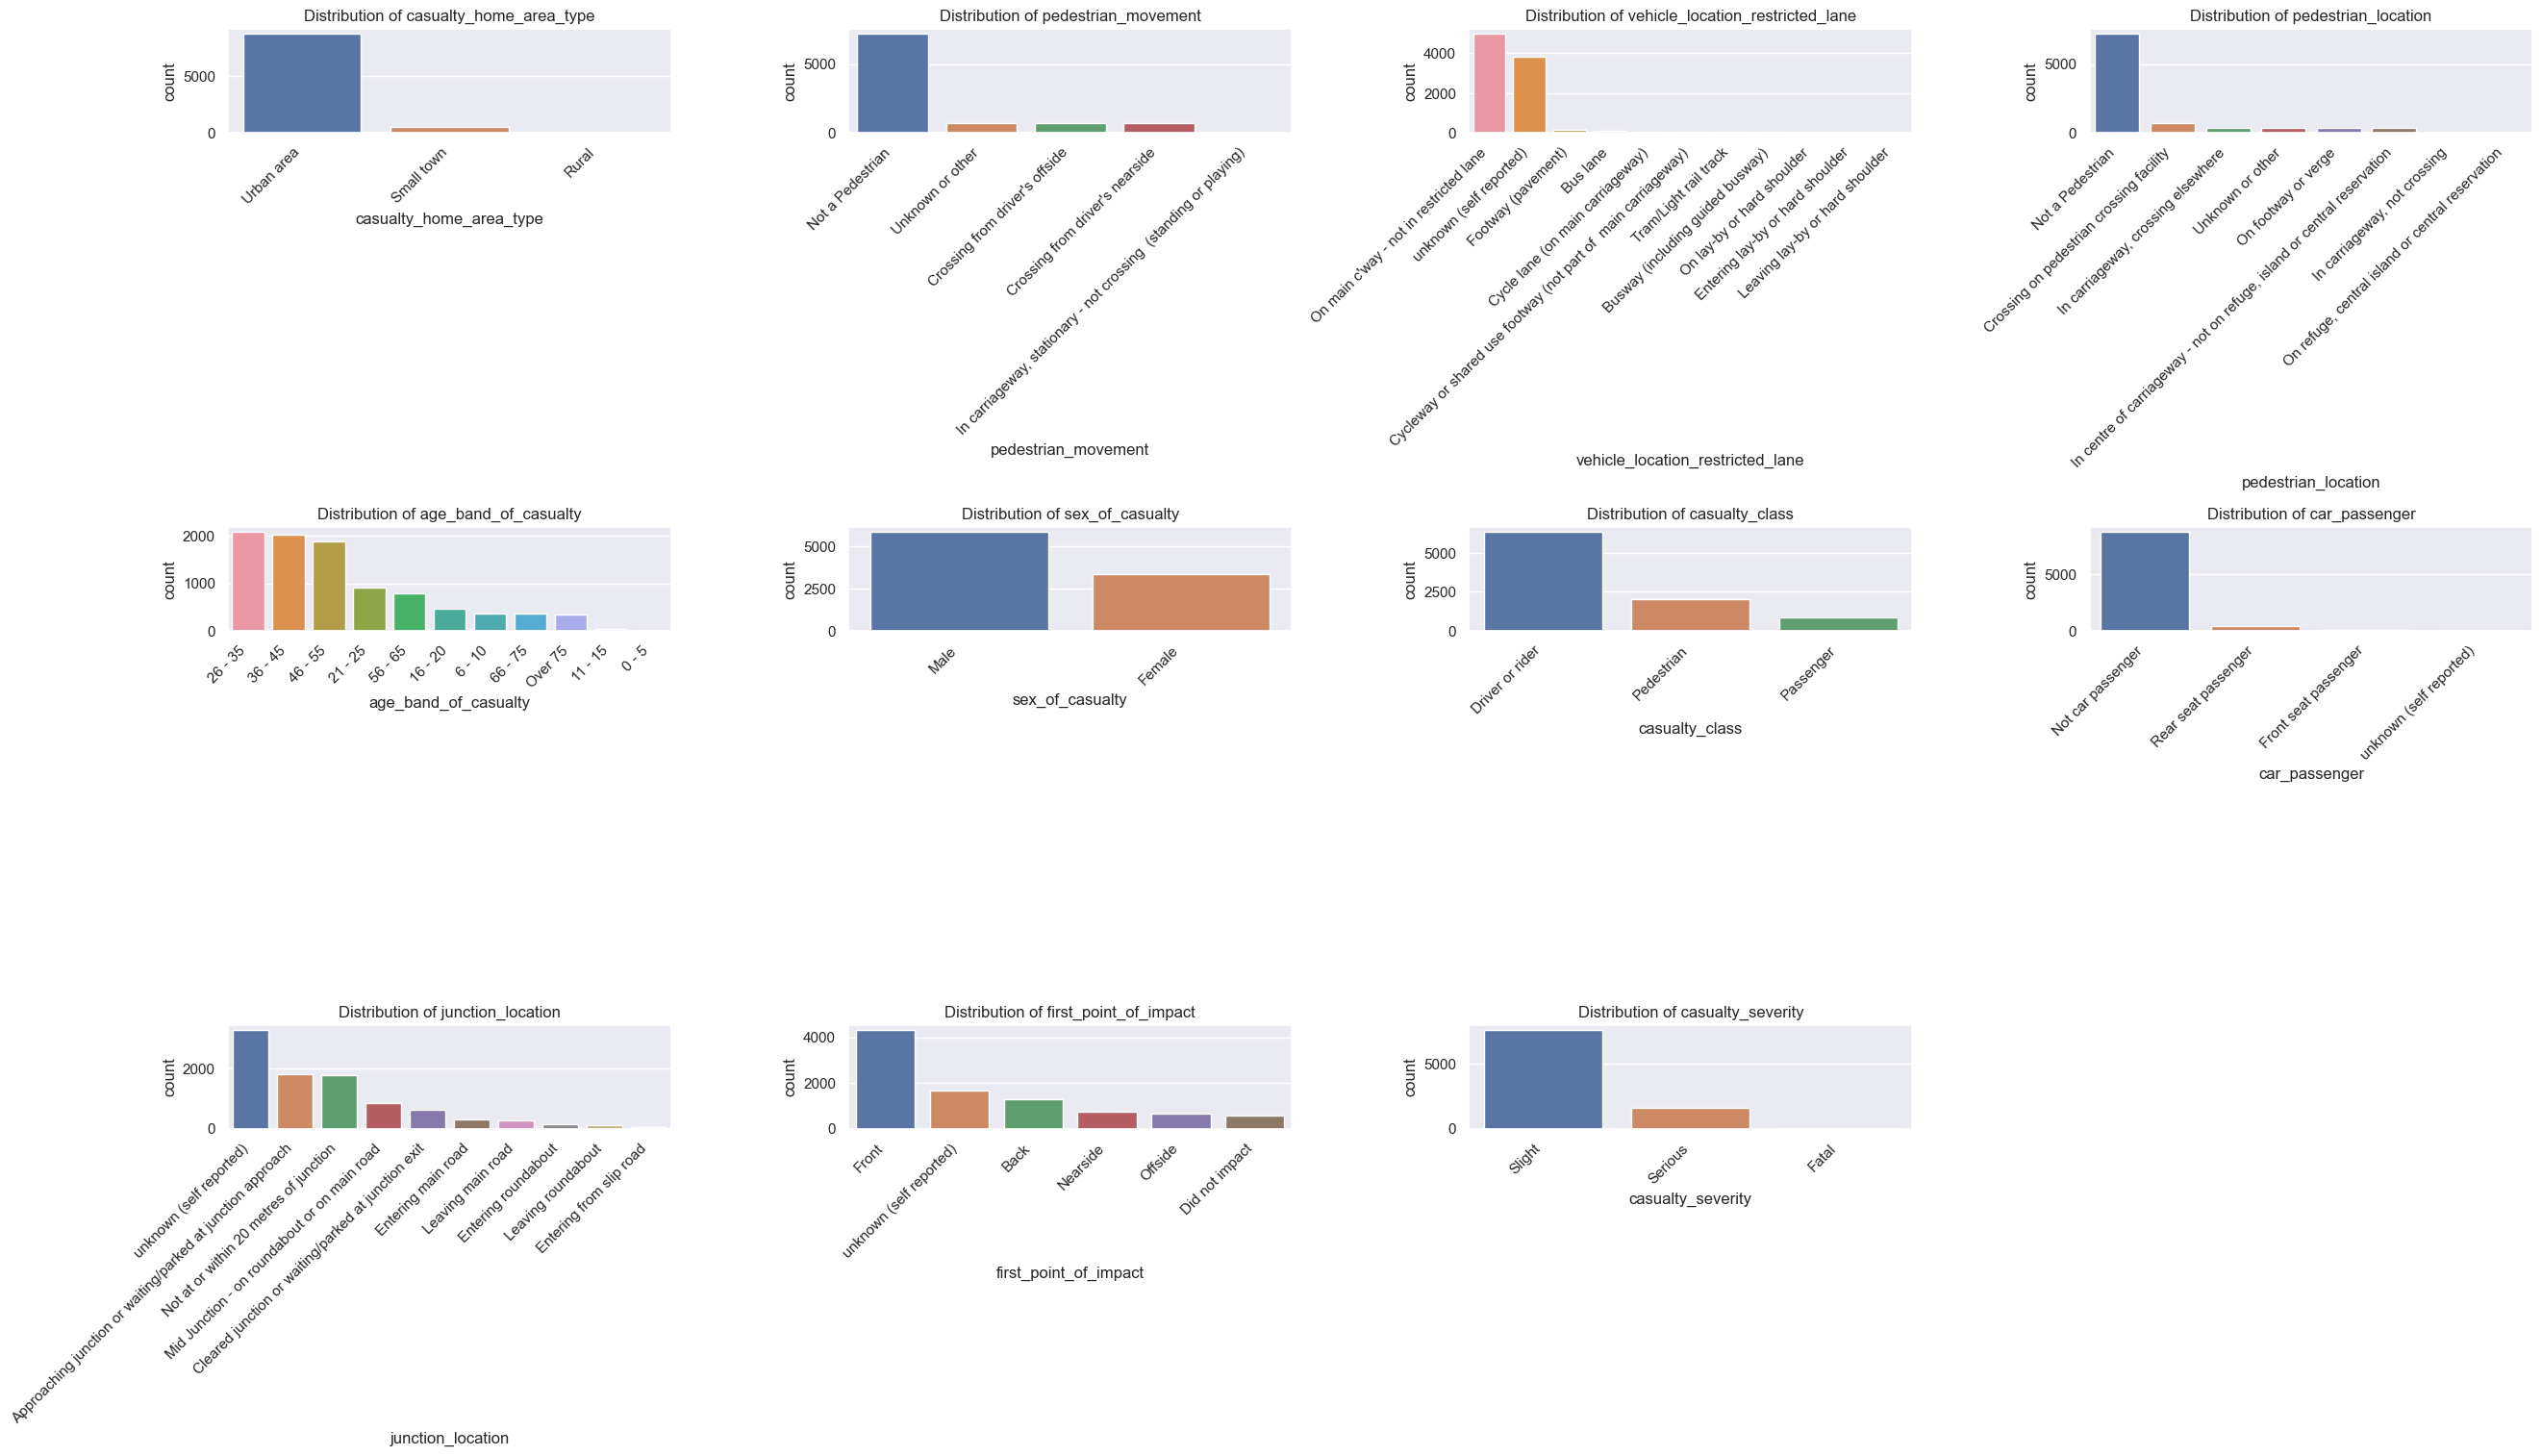

In [13]:
# Visualisation 1
plt.figure(figsize=(25, 12)) # Setting the figure size

# Loop through categorical columns and plot countplots
for i, column in enumerate(trainset.select_dtypes(include=['object', 'category']).columns, 1):
    plt.subplot(3, 4, i)  # Adjust grid layout (rows, cols, index) as needed
    sns.countplot(data=trainset, x=column, order=trainset[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-labels for readability
    plt.tight_layout()  # Prevent label overlap

plt.show()

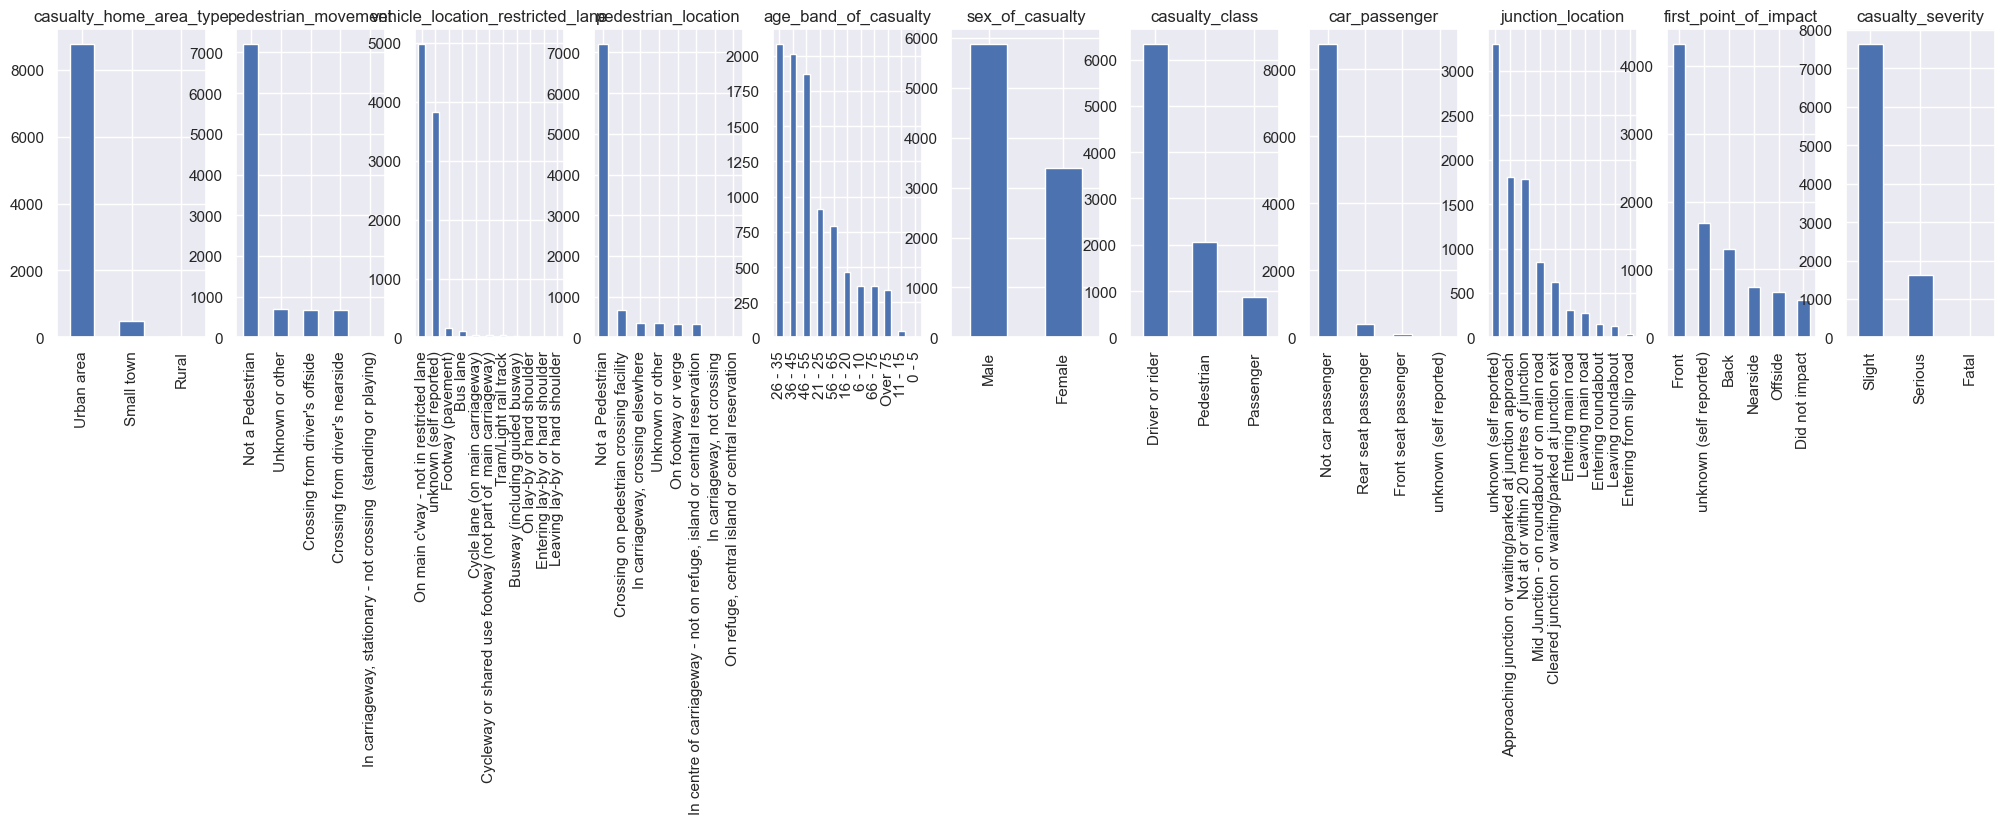

In [14]:
# Visualisation 2
visual2 = trainset.select_dtypes(include=['object']).columns

fig, ax = plt.subplots(1, len(visual2), figsize=(25, 4))
for i, col in enumerate(visual2):
    trainset[col].value_counts().plot(kind="bar", ax=ax[i]).set_title(col)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## 2.3 Feature Engineering

### 2.3.1 Combining Fatal and serious

In [15]:
pd.DataFrame(trainset['casualty_severity'].value_counts())

,casualty_severity
Slight,7630
Serious,1625
Fatal,2


In [16]:
# Replacing 'Fatal' with 'Serious' in the 'casualty_severity' column
trainset['casualty_severity'] = trainset['casualty_severity'].replace('Fatal', 'Serious')
testset['casualty_severity'] = testset['casualty_severity'].replace('Fatal', 'Serious')

In [17]:
pd.DataFrame(trainset['casualty_severity'].value_counts())

,casualty_severity
Slight,7630
Serious,1627


### 2.3.2 Interaction term (Age band of casualty + Casualty class)

In [18]:
# Concatenating 'age_band_of_casualty' and 'casualty_class'
trainset['age_casualty_class'] = trainset['age_band_of_casualty'].astype(str) + "_" + trainset['casualty_class'].astype(str)
testset['age_casualty_class'] = testset['age_band_of_casualty'].astype(str) + "_" + testset['casualty_class'].astype(str)

# Check the new interaction feature distribution
print(trainset['age_casualty_class'].value_counts())

36 - 45_Driver or rider    1636
46 - 55_Driver or rider    1509
26 - 35_Driver or rider    1369
21 - 25_Driver or rider     546
16 - 20_Driver or rider     441
56 - 65_Driver or rider     441
36 - 45_Passenger           373
26 - 35_Passenger           372
66 - 75_Driver or rider     360
46 - 55_Pedestrian          347
56 - 65_Pedestrian          343
26 - 35_Pedestrian          342
21 - 25_Pedestrian          341
6 - 10_Pedestrian           341
Over 75_Pedestrian          327
21 - 25_Passenger            27
16 - 20_Passenger            24
11 - 15_Driver or rider      23
6 - 10_Passenger             23
46 - 55_Passenger            18
11 - 15_Passenger            17
56 - 65_Passenger             8
Over 75_Driver or rider       7
36 - 45_Pedestrian            6
0 - 5_Passenger               6
11 - 15_Pedestrian            4
66 - 75_Passenger             4
6 - 10_Driver or rider        1
16 - 20_Pedestrian            1
Name: age_casualty_class, dtype: int64


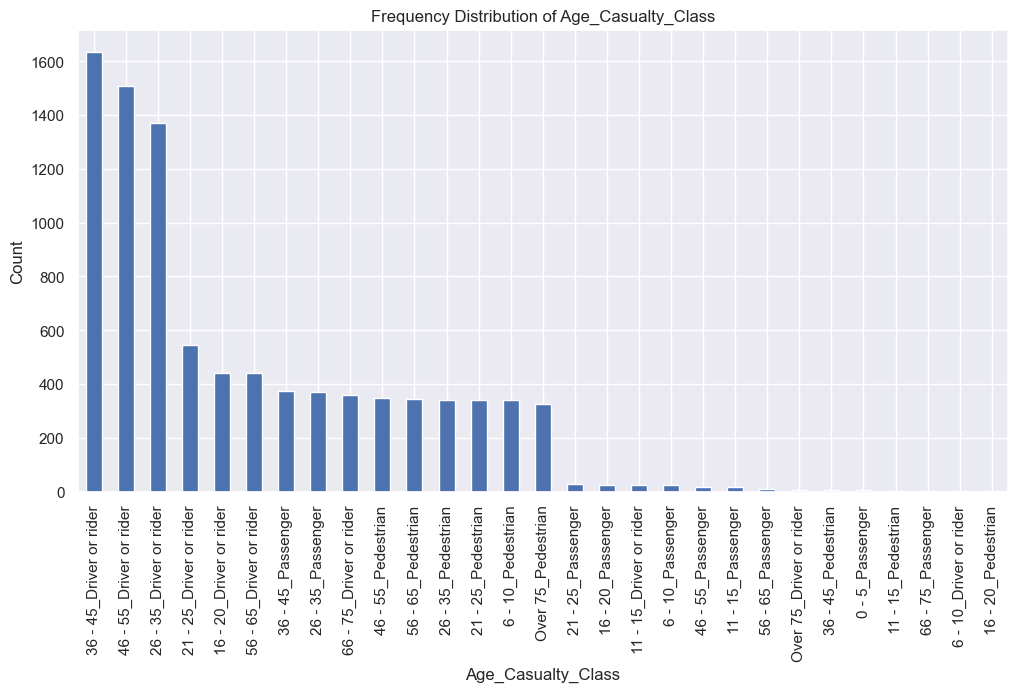

In [19]:
trainset['age_casualty_class'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Frequency Distribution of Age_Casualty_Class')
plt.xlabel('Age_Casualty_Class')
plt.ylabel('Count')
plt.show()

From the distribution, most casualties occur among middle-aged drivers or riders, particularly in the 36–45 and 26–35 age bands. Younger and older groups have fewer observations, indicating a skew towards adult drivers/riders in this dataset. This may reflect real-world demographics or usage patterns on the roads.

In [20]:
# Crosstab of counts
ct_counts = pd.crosstab(trainset["age_casualty_class"], trainset["casualty_severity"])
print("Count Crosstab:")
print(ct_counts)

Count Crosstab:
casualty_severity        Serious  Slight
age_casualty_class                      
0 - 5_Passenger                0       6
11 - 15_Driver or rider        6      17
11 - 15_Passenger              0      17
11 - 15_Pedestrian             0       4
16 - 20_Driver or rider       16     425
16 - 20_Passenger              3      21
16 - 20_Pedestrian             0       1
21 - 25_Driver or rider      370     176
21 - 25_Passenger              0      27
21 - 25_Pedestrian             0     341
26 - 35_Driver or rider       69    1300
26 - 35_Passenger              7     365
26 - 35_Pedestrian           339       3
36 - 45_Driver or rider       60    1576
36 - 45_Passenger              3     370
36 - 45_Pedestrian             0       6
46 - 55_Driver or rider       45    1464
46 - 55_Passenger              1      17
46 - 55_Pedestrian             0     347
56 - 65_Driver or rider       18     423
56 - 65_Passenger              2       6
56 - 65_Pedestrian           343       0


In [21]:
# Crosstab of percentages (by row)
ct_percent = pd.crosstab(trainset["age_casualty_class"], trainset["casualty_severity"], normalize='index') * 100
print("\nPercentage Crosstab:")
print(ct_percent)


Percentage Crosstab:
casualty_severity           Serious      Slight
age_casualty_class                             
0 - 5_Passenger            0.000000  100.000000
11 - 15_Driver or rider   26.086957   73.913043
11 - 15_Passenger          0.000000  100.000000
11 - 15_Pedestrian         0.000000  100.000000
16 - 20_Driver or rider    3.628118   96.371882
16 - 20_Passenger         12.500000   87.500000
16 - 20_Pedestrian         0.000000  100.000000
21 - 25_Driver or rider   67.765568   32.234432
21 - 25_Passenger          0.000000  100.000000
21 - 25_Pedestrian         0.000000  100.000000
26 - 35_Driver or rider    5.040175   94.959825
26 - 35_Passenger          1.881720   98.118280
26 - 35_Pedestrian        99.122807    0.877193
36 - 45_Driver or rider    3.667482   96.332518
36 - 45_Passenger          0.804290   99.195710
36 - 45_Pedestrian         0.000000  100.000000
46 - 55_Driver or rider    2.982107   97.017893
46 - 55_Passenger          5.555556   94.444444
46 - 55_Pedestrian

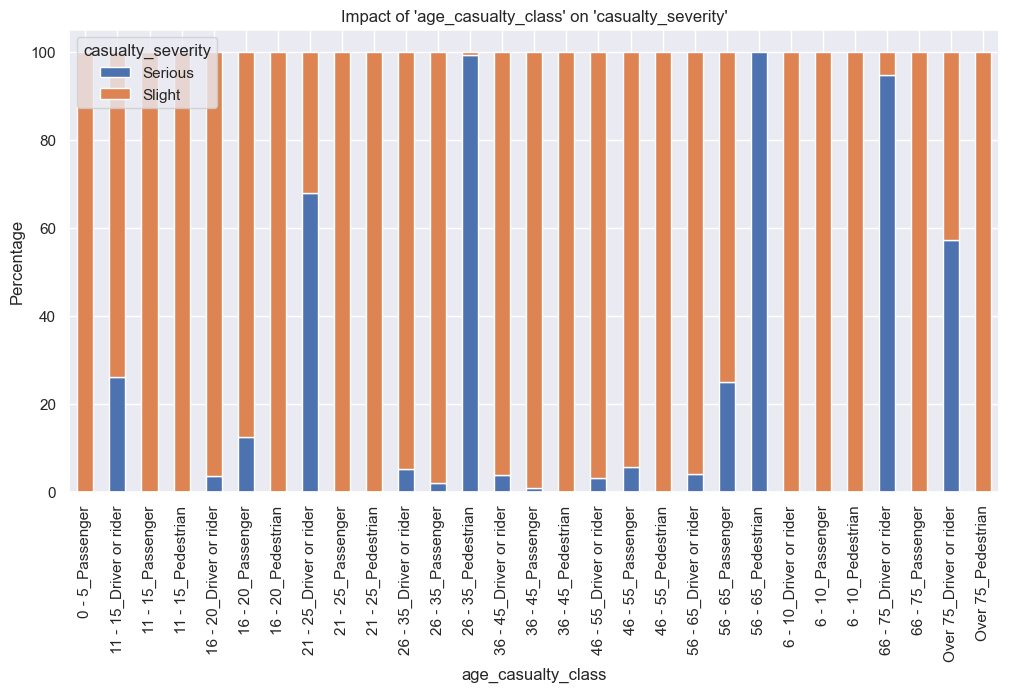

In [22]:
# Optional: Plot a stacked bar chart of the percentage crosstab
ct_percent.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Impact of 'age_casualty_class' on 'casualty_severity'")
plt.xlabel("age_casualty_class")
plt.ylabel("Percentage")
plt.legend(title='casualty_severity')
plt.show()

The chart shows that certain age–casualty class combinations have notably higher proportions of serious casualties, such as older pedestrians. Conversely, some younger or passenger categories are almost entirely slight. This highlights the strong influence of both age and casualty class on accident severity outcomes.

In [23]:
# Add to the dataset and view
trainset['age_casualty_class'] = (
    trainset['age_band_of_casualty'].astype(str) + "_" + trainset['casualty_class'].astype(str)
)
print(trainset.columns)

Index(['casualty_home_area_type', 'pedestrian_movement',
       'vehicle_location_restricted_lane', 'pedestrian_location',
       'age_band_of_casualty', 'sex_of_casualty', 'casualty_class',
       'car_passenger', 'junction_location', 'first_point_of_impact',
       'casualty_severity', 'age_casualty_class'],
      dtype='object')


## 3. Model Building
For this classification problem, before choosing the best model to evaluate on the testset, I will develop and evaluate five distinct models in this section by training them on the training set and assessing their performance:
1. **Decision Trees**
2. **Random Forest**
3. **Support Vector Machine**
4. **Logistic Regression**
5. **AdaBoost**

This approach will allow me to determine which algorithm captures the underlying patterns most effectively and delivers the best predictive accuracy for casualty severity.

In [24]:
# Defining X and y
y_train = pd.DataFrame(trainset.loc[:, 'casualty_severity']) # Sets 'casualty_severity' column as y
X_train = trainset.drop(columns=['casualty_severity'])

y_test = pd.DataFrame(testset.loc[:, 'casualty_severity']) 
X_test = testset.drop(columns=['casualty_severity'])

In [25]:
# Display dataset shapes
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (9257, 11), X_test shape: (1029, 11)
y_train shape: (9257, 1), y_test shape: (1029, 1)


In [26]:
X_train.head()

,casualty_home_area_type,pedestrian_movement,vehicle_location_restricted_lane,pedestrian_location,age_band_of_casualty,sex_of_casualty,casualty_class,car_passenger,junction_location,first_point_of_impact,age_casualty_class
0,Small town,Unknown or other,On main c'way - not in restricted lane,On footway or verge,21 - 25,Male,Pedestrian,Not car passenger,Not at or within 20 metres of junction,Front,21 - 25_Pedestrian
1,Urban area,Not a Pedestrian,unknown (self reported),Not a Pedestrian,36 - 45,Male,Driver or rider,Not car passenger,unknown (self reported),Front,36 - 45_Driver or rider
2,Urban area,Crossing from driver's nearside,unknown (self reported),"In carriageway, crossing elsewhere",46 - 55,Male,Pedestrian,Not car passenger,unknown (self reported),unknown (self reported),46 - 55_Pedestrian
3,Urban area,Crossing from driver's nearside,unknown (self reported),"In carriageway, crossing elsewhere",46 - 55,Male,Pedestrian,Not car passenger,Not at or within 20 metres of junction,Back,46 - 55_Pedestrian
4,Urban area,Crossing from driver's nearside,unknown (self reported),"In centre of carriageway - not on refuge, isla...",Over 75,Female,Pedestrian,Not car passenger,unknown (self reported),Back,Over 75_Pedestrian


In [27]:
print(X_train.isnull().sum()) # Check for missing (null) values in each column of the X_train DataFrame

casualty_home_area_type             0
pedestrian_movement                 0
vehicle_location_restricted_lane    0
pedestrian_location                 0
age_band_of_casualty                0
sex_of_casualty                     0
casualty_class                      0
car_passenger                       0
junction_location                   0
first_point_of_impact               0
age_casualty_class                  0
dtype: int64


### Baseline Model
This establishes a reference performance level against which all subsequent, more complex models will be compared. It will serve as a simple benchmark to determine if more sophisticated techniques provide meaningful improvements in predictive accuracy.

In [28]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
yhat = dummy_clf.predict(X_train)

p, r, f, s = precision_recall_fscore_support(y_train, yhat, average="macro", zero_division=0.0)
print("Baseline:")
print(f"Precision: {p:.3f}")
print(f"Recall: {r:.3f}")
print(f"F score: {f:.3f}")

Baseline:
Precision: 0.412
Recall: 0.500
F score: 0.452


In [29]:
# Folder to save the models

# Customize the folder name
folder_name = "my_models"

# Check if the folder exists; if not, create it
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    print(f"Folder '{folder_name}' created successfully.")
else:
    print(f"Folder '{folder_name}' already exists.")

# Listing files in the folder after creation
files = os.listdir(folder_name)
print(f"Files in '{folder_name}': {files}")


Folder 'my_models' already exists.
Files in 'my_models': ['refined_rf.joblib', 'adb.joblib', 'lr.joblib', 'lsvm.joblib', 'log_reg.joblib', 'lin-svm.joblib', 'rf.joblib', 'dt.joblib']


### 3.1 Decision Tree

In [30]:
start = timer()

# One-hot encode the training and test feature sets
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align the encoded data so both train and test sets have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Define the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=7)

# Define the hyperparameter grid
hp_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
    'min_samples_split': [5, 10, 15, 20, 25, 30, 35],
}

# Set up GridSearchCV with 5-fold cross-validation and macro f1 scoring
grid_search = GridSearchCV(dt, hp_grid, cv=5, scoring='f1_macro', 
                           return_train_score=True, verbose=2)

# Fit GridSearchCV on the encoded training data
grid_search.fit(X_train_encoded, y_train.values.ravel())

# Output the best parameters and best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Optionally, evaluate the best estimator on the test set
best_dt = grid_search.best_estimator_
y_test_pred = best_dt.predict(X_test_encoded)
print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

time_dt = timedelta(seconds=timer() - start)
# Print execution time
print("Execution time HH:MM:SS:", timedelta(seconds=timer() - start))

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=15; total time=   0.0s
[CV] END ..................max_depth=5, min_sam

[CV] END .................max_depth=15, min_samples_split=35; total time=   0.0s
[CV] END .................max_depth=15, min_samples_split=35; total time=   0.0s
[CV] END .................max_depth=15, min_samples_split=35; total time=   0.0s
[CV] END ..................max_depth=20, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=20, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=20, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=20, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=20, min_samples_split=5; total time=   0.0s
[CV] END .................max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END .................max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END .................max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END .................max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END .................ma

[CV] END .................max_depth=30, min_samples_split=35; total time=   0.0s
[CV] END .................max_depth=30, min_samples_split=35; total time=   0.0s
[CV] END .................max_depth=30, min_samples_split=35; total time=   0.0s
[CV] END .................max_depth=30, min_samples_split=35; total time=   0.0s
[CV] END ..................max_depth=35, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=35, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=35, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=35, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=35, min_samples_split=5; total time=   0.0s
[CV] END .................max_depth=35, min_samples_split=10; total time=   0.0s
[CV] END .................max_depth=35, min_samples_split=10; total time=   0.0s
[CV] END .................max_depth=35, min_samples_split=10; total time=   0.0s
[CV] END .................ma

In [31]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=30, random_state=7)

In [32]:
grid_search.best_score_

0.9224668488484085

In [33]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
12,"{'max_depth': 10, 'min_samples_split': 30}",0.924865,0.922467,0.259286
13,"{'max_depth': 10, 'min_samples_split': 35}",0.924865,0.922296,0.277786
5,"{'max_depth': 5, 'min_samples_split': 30}",0.923273,0.922281,0.107481
1,"{'max_depth': 5, 'min_samples_split': 10}",0.923273,0.922281,0.107481
6,"{'max_depth': 5, 'min_samples_split': 35}",0.923273,0.922281,0.107481
0,"{'max_depth': 5, 'min_samples_split': 5}",0.923273,0.922281,0.107481
4,"{'max_depth': 5, 'min_samples_split': 25}",0.923273,0.922281,0.107481
3,"{'max_depth': 5, 'min_samples_split': 20}",0.923273,0.922281,0.107481
2,"{'max_depth': 5, 'min_samples_split': 15}",0.923273,0.922281,0.107481
11,"{'max_depth': 10, 'min_samples_split': 25}",0.925063,0.921615,0.372699


Decison Tree: The best model has a maximum depth of 10 and minimum sample split of 30. Configurations yield similar performance, but those with lower differences between training and test scores suggest better generalisation and less overfitting. 

In [34]:
# Save the best estimator from GridSearchCV to a file
dump(grid_search.best_estimator_, 'my_models/dt.joblib')
print("Model saved successfully.")

Model saved successfully.


### 2.2 Random Forest

In [35]:
start = timer()

rf = RandomForestClassifier(random_state=7, max_depth=40, min_samples_split=5)

# specify the hyperparameters and their values
# 3 x 2 x 2 = 12 combinations in the grid
hp_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ["sqrt", 0.5],
    'max_samples': [None, 0.5],
}

grid_search = GridSearchCV(rf, hp_grid, cv=5,
                           scoring='f1_macro', 
                           return_train_score=True, verbose=2)

grid_search.fit(X_train_encoded, y_train.values.ravel())

time_rf = timedelta(seconds=timer() - start)
print("Execution time HH:MM:SS:", timedelta(seconds=timer() - start))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_features=sqrt, max_samples=None, n_estimators=100; total time=   0.2s
[CV] END max_features=sqrt, max_samples=None, n_estimators=100; total time=   0.2s
[CV] END max_features=sqrt, max_samples=None, n_estimators=100; total time=   0.2s
[CV] END max_features=sqrt, max_samples=None, n_estimators=100; total time=   0.2s
[CV] END max_features=sqrt, max_samples=None, n_estimators=100; total time=   0.2s
[CV] END max_features=sqrt, max_samples=None, n_estimators=200; total time=   0.5s
[CV] END max_features=sqrt, max_samples=None, n_estimators=200; total time=   0.5s
[CV] END max_features=sqrt, max_samples=None, n_estimators=200; total time=   0.5s
[CV] END max_features=sqrt, max_samples=None, n_estimators=200; total time=   0.5s
[CV] END max_features=sqrt, max_samples=None, n_estimators=200; total time=   0.5s
[CV] END max_features=sqrt, max_samples=None, n_estimators=500; total time=   1.3s
[CV] END max_features=sqrt

In [36]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=40, max_samples=0.5, min_samples_split=5,
                       random_state=7)

In [37]:
grid_search.best_score_

0.9210687819775497

In [38]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
3,"{'max_features': 'sqrt', 'max_samples': 0.5, 'n_estimators': 100}",0.926933,0.921069,0.632668
4,"{'max_features': 'sqrt', 'max_samples': 0.5, 'n_estimators': 200}",0.927060,0.920479,0.709923
5,"{'max_features': 'sqrt', 'max_samples': 0.5, 'n_estimators': 500}",0.926817,0.920479,0.683851
10,"{'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200}",0.928065,0.919639,0.907858
11,"{'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 500}",0.927610,0.919423,0.882611
9,"{'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}",0.928011,0.919211,0.948336
6,"{'max_features': 0.5, 'max_samples': None, 'n_estimators': 100}",0.932666,0.917944,1.578494
0,"{'max_features': 'sqrt', 'max_samples': None, 'n_estimators': 100}",0.931052,0.917742,1.429535
1,"{'max_features': 'sqrt', 'max_samples': None, 'n_estimators': 200}",0.930948,0.917656,1.427807
7,"{'max_features': 0.5, 'max_samples': None, 'n_estimators': 200}",0.932658,0.917645,1.609711


Random Forest: The best trade-off between performance and overfitting comes from {'max_features': 'sqrt', 'max_samples': 0.5, 'n_estimators': 100}, achieving a test score of 0.921 with minimal overfitting (0.63% difference from train score). 

In [39]:
dump(grid_search.best_estimator_, 'my_models/rf.joblib')
print("Model saved successfully.")

Model saved successfully.


### 2.3 Linear Support Vector Machine (SVM)

In [40]:
start = timer()

# Instantiate the LinearSVC model with a fixed random state and increased max_iter for convergence
lsvm = LinearSVC(random_state=7, max_iter=5000)

# Define the hyperparameter grid to search over (here, only tuning the regularization parameter C)
hp_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10]
}

# Set up GridSearchCV with 5-fold cross-validation and macro F1 scoring
grid_search = GridSearchCV(lsvm, hp_grid, cv=5, scoring='f1_macro', return_train_score=True, verbose=2)

# Fit GridSearchCV on the pre-processed training data (ensure y_train is a 1D array)
grid_search.fit(X_train_encoded, y_train.values.ravel())

# Print best parameters and best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

time_lsvm = timedelta(seconds=timer() - start)
# Print execution time
print("Execution time HH:MM:SS:", timedelta(seconds=timer() - start))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ........................................

In [41]:
grid_search.best_estimator_

LinearSVC(C=10, max_iter=5000, random_state=7)

In [42]:
grid_search.best_score_

0.9187685854838291

In [43]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
4,{'C': 10},0.919317,0.918769,0.059706
3,{'C': 1},0.919340,0.918736,0.065713
1,{'C': 0.01},0.918296,0.918116,0.019674
2,{'C': 0.1},0.918800,0.918116,0.074505
0,{'C': 0.001},0.869002,0.868985,0.001969


Linear SVM: For C values of 0.01, 0.1, 1, and 10, the model performs consistently well, with training and test scores both around 91.8–91.9% and minimal differences, indicating strong generalisation. In contrast, setting C to 0.001 significantly lowers performance to around 86.9%, suggesting that excessive regularisation hampers the model's ability to capture the data's patterns.

In [44]:
dump(grid_search.best_estimator_, 'my_models/lsvm.joblib')
print("Model saved successfully.")

Model saved successfully.


### 2.4 Logistic Regression

In [45]:
start = timer()

# Instantiate Logistic Regression with a fixed random state and increased max_iter for convergence
lr_model = LogisticRegression(random_state=7, max_iter=1000)

# Define the hyperparameter grid (tuning the regularization strength C)
hp_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

# Set up GridSearchCV with 5-fold cross-validation and macro F1 scoring
grid_search = GridSearchCV(lr_model, hp_grid, cv=5, scoring='f1_macro', 
                           return_train_score=True, verbose=2)

# Fit GridSearchCV on the one-hot encoded training data (ensure y_train is a 1D array)
grid_search.fit(X_train_encoded, y_train.values.ravel())

# Print best parameters, CV score, and execution time
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Retrieve the best model and evaluate on the test set
best_lr = grid_search.best_estimator_
y_test_pred = best_lr.predict(X_test_encoded)

print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

time_lr = timedelta(seconds=timer() - start)
print("Execution time HH:MM:SS:", timedelta(seconds=timer() - start))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ........................................

In [46]:
grid_search.best_estimator_

LogisticRegression(C=0.1, max_iter=1000, random_state=7)

In [47]:
grid_search.best_score_

0.922246878985731

In [48]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
cv_results["diff, %"] = 100*(cv_results["mean_train_score"]-cv_results["mean_test_score"]
                                                     )/cv_results["mean_train_score"]

pd.set_option('display.max_colwidth', 100)
cv_results.sort_values('mean_test_score', ascending=False)

,params,mean_train_score,mean_test_score,"diff, %"
2,{'C': 0.1},0.922314,0.922247,0.007228
3,{'C': 1},0.922291,0.921054,0.134055
4,{'C': 10},0.922131,0.919827,0.249894
1,{'C': 0.01},0.865854,0.865271,0.067337
0,{'C': 0.001},0.451827,0.451827,-0.000002


Logistic Regression: The results show that a C value of 0.1 yields the best balance, with training and test scores both around 92.23% and almost no gap, indicating excellent generalisation. In contrast, using a very small C (0.001) leads to poor performance, while increasing C beyond 0.1 provides only marginal gains with a slightly larger train–test difference.

In [49]:
dump(grid_search.best_estimator_, 'my_models/lr.joblib')
print("Model saved successfully.")

Model saved successfully.


### 2.5 AdaBoost

In [50]:
start = timer()

# Instantiate the AdaBoost classifier with a fixed random state
ada = AdaBoostClassifier(random_state=7)

# Define the hyperparameter grid: tuning the number of estimators and learning rate
hp_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}

# Set up GridSearchCV with 5-fold cross-validation and macro F1 score as the metric
grid_search = GridSearchCV(ada, hp_grid, cv=5, scoring='f1_macro', 
                           return_train_score=True, verbose=2)

# Fit GridSearchCV on the encoded training data (flatten y_train if needed)
grid_search.fit(X_train_encoded, y_train.values.ravel())

# Print best parameters, best CV score, and execution time
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Retrieve the best estimator from grid search
best_ada = grid_search.best_estimator_

# Evaluate the best model on the test set
y_test_pred = best_ada.predict(X_test_encoded)
print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

time_adb = timedelta(seconds=timer() - start)
print("Execution time HH:MM:SS:", timedelta(seconds=timer() - start))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.6s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.6s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.6s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.6s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.6s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   1.4s
[CV] END ...............learning_rate=0.01, n_es

In [51]:
grid_search.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=7)

In [52]:
grid_search.best_score_

0.9224136470734674

In [53]:
cv_results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]

# Calculate the percentage difference between train and test scores
cv_results["diff, %"] = 100 * (cv_results["mean_train_score"] - cv_results["mean_test_score"]) / cv_results["mean_train_score"]

# Set the maximum column width for display purposes
pd.set_option('display.max_colwidth', 100)

# Sort the DataFrame by mean_test_score in descending order and print the results
print(cv_results.sort_values('mean_test_score', ascending=False))


                                          params  mean_train_score  \
4    {'learning_rate': 0.1, 'n_estimators': 100}          0.922271   
5    {'learning_rate': 0.1, 'n_estimators': 200}          0.922186   
6       {'learning_rate': 1, 'n_estimators': 50}          0.921627   
8      {'learning_rate': 1, 'n_estimators': 200}          0.921269   
7      {'learning_rate': 1, 'n_estimators': 100}          0.921301   
3     {'learning_rate': 0.1, 'n_estimators': 50}          0.911639   
1   {'learning_rate': 0.01, 'n_estimators': 100}          0.863363   
2   {'learning_rate': 0.01, 'n_estimators': 200}          0.863363   
0    {'learning_rate': 0.01, 'n_estimators': 50}          0.844455   
9      {'learning_rate': 10, 'n_estimators': 50}          0.635299   
10    {'learning_rate': 10, 'n_estimators': 100}          0.635299   
11    {'learning_rate': 10, 'n_estimators': 200}          0.635299   

    mean_test_score   diff, %  
4          0.922414 -0.015466  
5          0.922072  0.01

AdaBoost: The results indicate that models with a learning_rate of 0.1 and n_estimators of 100 or 200 perform best, achieving training and test scores around 92.2% with almost negligible differences, which suggests excellent generalisation. In contrast, using very low (0.01) or very high (10) learning rates dramatically reduces performance.

In [54]:
dump(grid_search.best_estimator_, 'my_models/adb.joblib')
print("Model saved successfully.")

Model saved successfully.


## 4. Model Evaluation

### 4.1 Evaluation on time taken

In [55]:
print("Elapsed time: Decision Tree", time_dt)
print("Elapsed time: Random Forest", time_rf)
print("Elapsed time: Linear SVM", time_lsvm)
print("Elapsed time: Logistic Regression ", time_lr)
print("Elapsed time: AdaBoost", time_adb)

Elapsed time: Decision Tree 0:00:15.500301
Elapsed time: Random Forest 0:01:15.467553
Elapsed time: Linear SVM 0:00:03.846463
Elapsed time: Logistic Regression  0:00:02.123599
Elapsed time: AdaBoost 0:01:00.236286


The runtimes show that simpler models like Logistic Regression (2.12 seconds) and Linear SVM (3.84 seconds) are significantly faster, while more complex ensemble methods like Random Forest (1:15) and AdaBoost (1:00) take considerably longer. This indicates a trade-off between computational efficiency and model complexity, which should be considered when choosing a model for deployment.

### 4.2 Model Performance 

In [56]:
from joblib import load
best_dt= load("my_models/dt.joblib")
best_rf = load("my_models/rf.joblib")
best_lsvm = load("my_models/lsvm.joblib")
best_lr = load("my_models/lr.joblib")
best_adb = load("my_models/adb.joblib")

### 4.2.1 Decision Tree

In [57]:
# Model prediction
yhat = best_dt.predict(X_test_encoded)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(y_test, yhat, average="macro")
print("Decision Tree:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Decision Tree:
Precision: 0.9254733243732836
Recall: 0.9007774872712261
F score: 0.9125235551651342


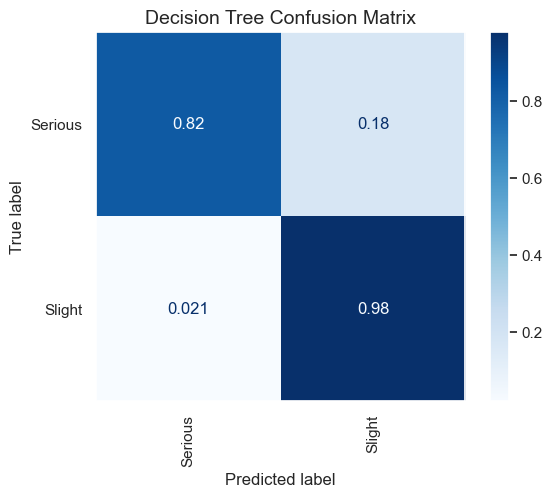

In [58]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, yhat, labels=best_dt.classes_,
                                        xticks_rotation="vertical", normalize="true",
                                        cmap=plt.cm.Blues)

ax = plt.gca()
ax.grid(False) 
plt.title('Decision Tree Confusion Matrix', fontsize=14)
plt.show()

The model is more accurate at identifying slight casualties, while a higher proportion of serious cases are misclassified as slight. 

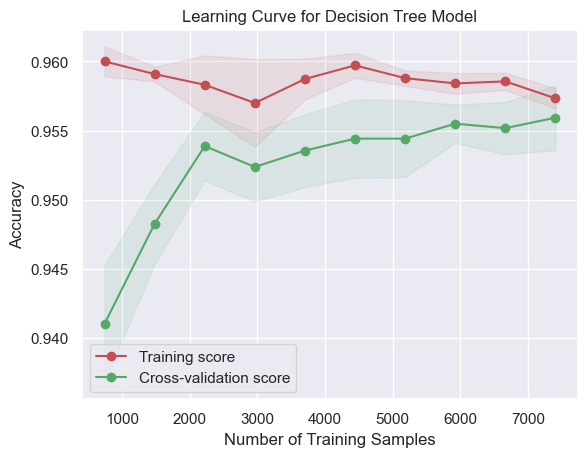

In [59]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_dt,
    X=X_train_encoded,
    y=y_train.values.ravel(),
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
)

# Calculate means and standard deviations for training and cross-validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                 alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                 alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Decision Tree Model")
plt.legend(loc="best")
plt.grid(True)
plt.show()


The model’s cross-validation performance steadily rises towards its training performance, suggesting it generaliSes well. Beyond a certain point, adding more data provides diminishing returns, indicating the model is near its performance plateau.

### 4.2.2 Random Forest

In [60]:
# Model prediction
yhat = best_rf.predict(X_test_encoded)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(y_test, yhat, average="macro")
print("Random Forest:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Random Forest:
Precision: 0.9354191494818145
Recall: 0.8971859089032613
F score: 0.9148913981588034


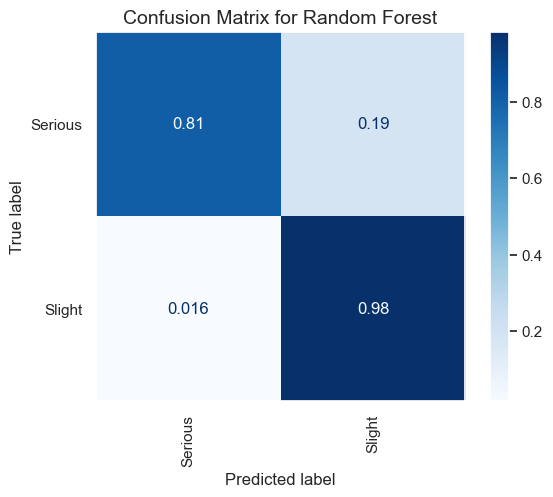

In [61]:
#Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, yhat, labels=best_rf.classes_, 
                                        xticks_rotation="vertical", normalize="true",
                                        cmap=plt.cm.Blues)
ax = plt.gca()
ax.grid(False) 
plt.title('Confusion Matrix for Random Forest', fontsize=14)
plt.show() 

The model is generally better at identifying slight casualties than serious ones. While most serious cases are correctly classified, a notable fraction are mislabeled as slight.

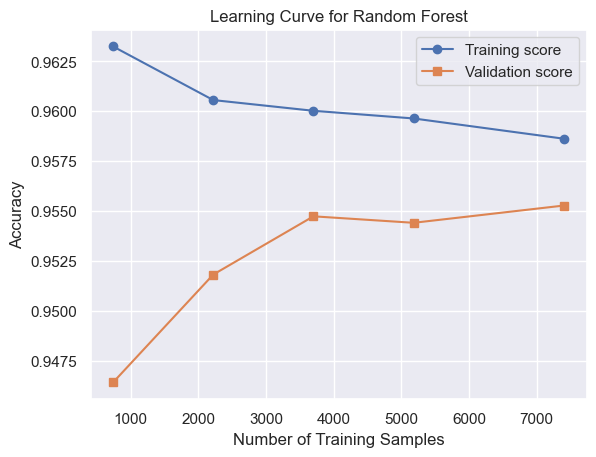

In [62]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_rf,
    X=X_train_encoded,
    y=y_train,
    train_sizes=[0.1, 0.3, 0.5, 0.7, 1.0],  # Fractions of the training data
    cv=5,            # 5-fold cross-validation
    scoring='accuracy'
)

# mean scores across folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, marker='o', label='Training score')
plt.plot(train_sizes, test_scores_mean, marker='s', label='Validation score')

plt.title("Learning Curve for Random Forest")
plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


The validation score steadily rises with more training data, converging towards the training score around 0.92–0.93. Thus the model benefits from additional samples and ultimately generalises well.

### 4.2.3 Linear SVM

In [63]:
# Model prediction
yhat = best_lsvm.predict(X_test_encoded)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(y_test, yhat, average="macro")
print("Linear SVM:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Linear SVM:
Precision: 0.9180775395712282
Recall: 0.9019918811063713
F score: 0.9097748316498315


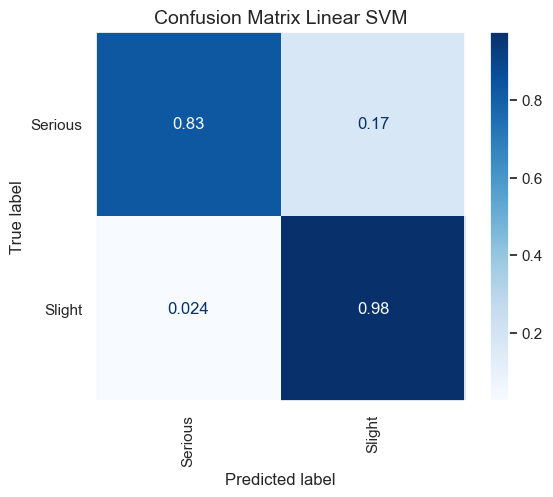

In [64]:
#Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, yhat, labels=best_lsvm.classes_, 
                                        xticks_rotation="vertical", normalize="true",
                                        cmap=plt.cm.Blues)
ax = plt.gca()
ax.grid(False) 
plt.title('Confusion Matrix Linear SVM', fontsize=14)
plt.show() 

The model correctly identifies 83% of serious casualties but misclassifies 17% as slight. It also does well with slight casualties, correctly labeling 98% of them.

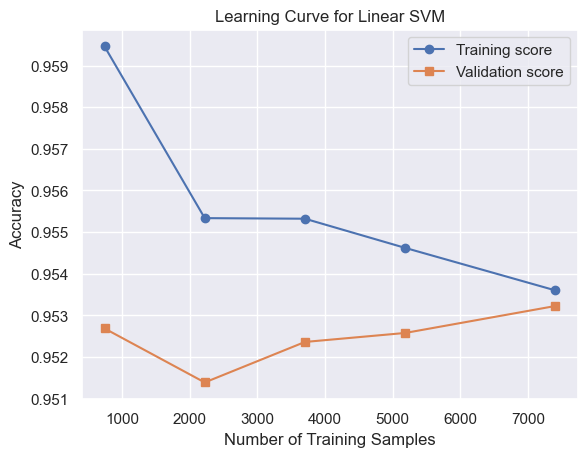

In [65]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_lsvm,
    X=X_train_encoded,
    y=y_train,
    train_sizes=[0.1, 0.3, 0.5, 0.7, 1.0],  
    cv=5,              
    scoring='accuracy',
    n_jobs=-1
)

# Compute mean scores across folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, marker='o', label='Training score')
plt.plot(train_sizes, test_scores_mean, marker='s', label='Validation score')

plt.title("Learning Curve for Linear SVM")
plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


The training curve starts high and gradually declines as more data is added, while the validation curve increases, narrowing the gap, thus the model benefits from additional samples, improving its ability to generalise.

### 4.2.4 Logistic Regression

In [66]:
# Model prediction
yhat = best_lr.predict(X_test_encoded)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(y_test, yhat, average="macro")
print("Logistic Regression:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

Logistic Regression:
Precision: 0.9283306899286281
Recall: 0.9013588826200634
F score: 0.9141320076346042


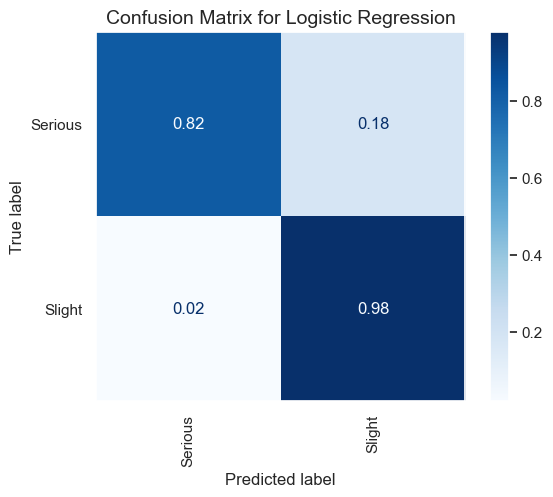

In [67]:
#Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, yhat, labels=best_lr.classes_, 
                                        xticks_rotation="vertical", normalize="true",
                                        cmap=plt.cm.Blues)
ax = plt.gca()
ax.grid(False) 
plt.title('Confusion Matrix for Logistic Regression', fontsize=14)
plt.show() 

While the model slightly underperforms on the serious category, misclassifying 18% as slight, it generally demonstrates strong overall performance.

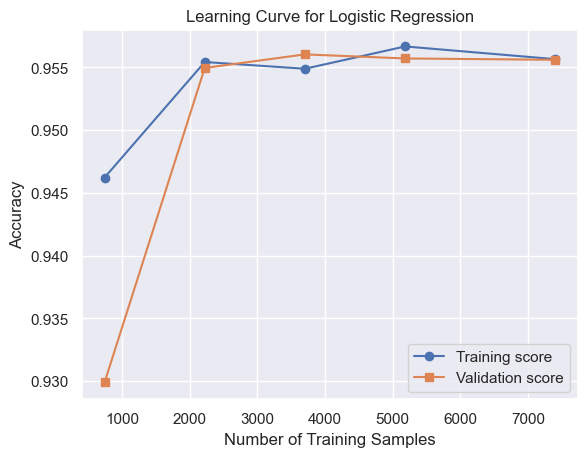

In [68]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_lr,
    X=X_train_encoded,
    y=y_train,
    train_sizes=[0.1, 0.3, 0.5, 0.7, 1.0],  
    cv=5,              
    scoring='accuracy', 
    n_jobs=-1
)

# Calculate mean scores across folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, marker='o', label='Training score')
plt.plot(train_sizes, test_scores_mean, marker='s', label='Validation score')

plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Validation accuracy quickly approaches about 95.5%, closely matching the training accuracy and indicating that Logistic Regression generalises well with more data.

### 4.2.5 AdaBoost

In [69]:
# Model prediction
yhat = best_adb.predict(X_test_encoded)

# micro-averaged precision, recall and f-score
p, r, f, s = precision_recall_fscore_support(y_test, yhat, average="macro")
print("AdaBoost:")
print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"F score: {f}")

AdaBoost:
Precision: 0.9283306899286281
Recall: 0.9013588826200634
F score: 0.9141320076346042


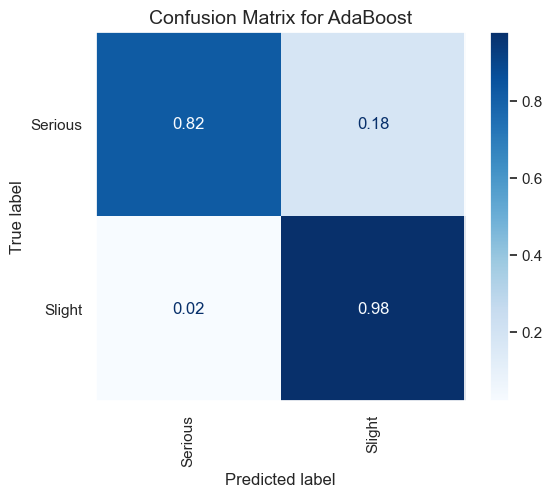

In [70]:
#Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, yhat, labels=best_adb.classes_, 
                                        xticks_rotation="vertical", normalize="true",
                                        cmap=plt.cm.Blues)
ax = plt.gca()
ax.grid(False) 
plt.title('Confusion Matrix for AdaBoost', fontsize=14)
plt.show() 

AdaBoost correctly identifies 98% of slight casualties, indicating a stronger performance for the slight category.

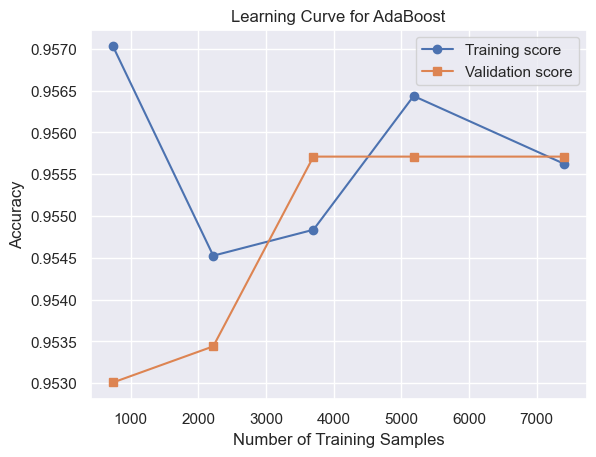

In [71]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_adb,
    X=X_train_encoded,
    y=y_train,
    train_sizes=[0.1, 0.3, 0.5, 0.7, 1.0],  
    cv=5,              
    scoring='accuracy', 
    n_jobs=-1
)

# Calculate mean scores across folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, marker='o', label='Training score')
plt.plot(train_sizes, test_scores_mean, marker='s', label='Validation score')

plt.title("Learning Curve for AdaBoost")
plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


The model starts with a high training accuracy that briefly dips but then recovers, while the validation accuracy steadily rises. This convergence around 95.6% indicates that additional training data improves generalisation, resulting in a small gap between training and validation performance.

## 4.3 Comparison of the models

In [72]:
# Dictionary of the trained models
models = {
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "Linear SVM": best_lsvm,
    "Logistic Regression": best_lr,
    "AdaBoost": best_adb
}

# list creation to store evaluation results
results = []

# Loop through each model and evaluate on the test set
for model_name, model in models.items():
    y_pred = model.predict(X_test_encoded) 
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Append results in a list of dicts
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert results to a DataFrame
comparison_df = pd.DataFrame(results)

# Sort by F1 score (descending)
comparison_df.sort_values(by='F1 Score', ascending=False, inplace=True)

# Print comparison
print(comparison_df)

                 Model  Accuracy  Precision    Recall  F1 Score
1        Random Forest  0.955296   0.954312  0.955296  0.954271
3  Logistic Regression  0.954325   0.953382  0.954325  0.953582
4             AdaBoost  0.954325   0.953382  0.954325  0.953582
0        Decision Tree  0.953353   0.952417  0.953353  0.952656
2           Linear SVM  0.951409   0.950655  0.951409  0.950933


All models perform very similarly, with accuracies in the mid-95% range; however, Random Forest edges out the others with a slight advantage. The differences are minimal, suggesting that while all models generalise well, Random Forest may be the best choice for this dataset.

### Error Analysis and ROC Curve (for binary classification)

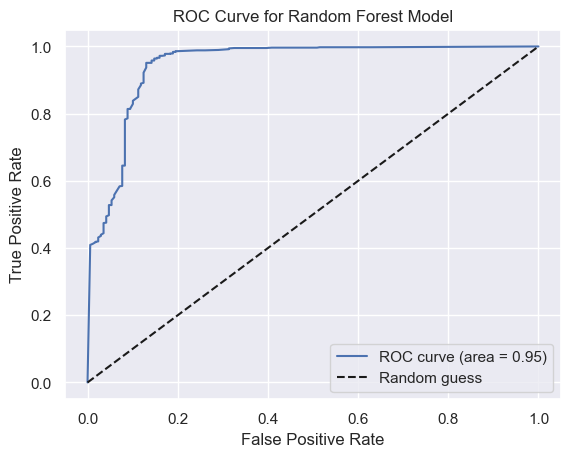

In [73]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get predicted probabilities for the positive class
y_prob = best_rf.predict_proba(X_test_encoded)[:, 1] 

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='Slight')
roc_auc = auc(fpr, tpr)

# Plot the ROC curve

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

An AUC of 0.95 indicates that the Random Forest model is very effective at distinguishing between the positive and negative classes. The curve is far above the random-guess diagonal, suggesting strong predictive performance.

### Calibration Curve (to assess predicted probabilities)

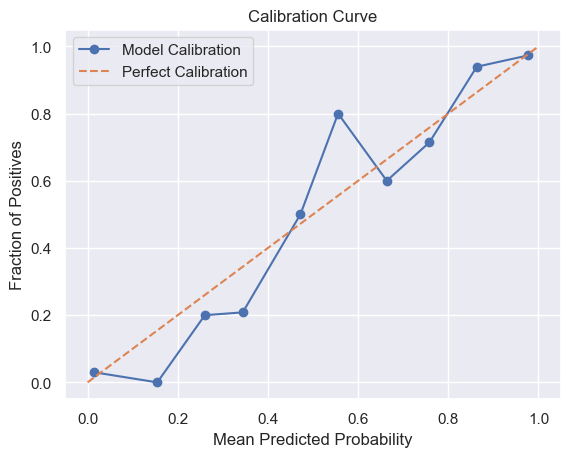

In [74]:
from sklearn.preprocessing import LabelEncoder
from sklearn.calibration import calibration_curve

# Convert y_test to numeric values (0 and 1)
le = LabelEncoder()
y_test_num = le.fit_transform(y_test)  # Now, y_test_num contains integers

# Get predicted probabilities for the positive class
y_prob = best_rf.predict_proba(X_test_encoded)[:, 1]

# Compute the calibration curve
prob_true, prob_pred = calibration_curve(y_test_num, y_prob, n_bins=10)

# Plot the calibration curve
plt.plot(prob_pred, prob_true, marker='o', label='Model Calibration')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curve")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

This calibration curve is generally close to the diagonal, suggesting the model’s predicted probabilities are fairly well aligned with the actual fraction of positives. However, the curve deviates at higher predicted probabilities, indicating the model may be slightly overconfident in that range.

### Ensemble of Top Models using VotingClassifier

In [75]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create a soft-voting ensemble of Random Forest, Logistic Regression, and AdaBoost
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('lr', best_lr),
        ('adb', best_adb)
    ],
    voting='soft'
)

ensemble_model.fit(X_train_encoded, y_train.values.ravel())
y_ensemble = ensemble_model.predict(X_test_encoded)

print("Ensemble Model Evaluation:")
print(classification_report(y_test, y_ensemble))
print(confusion_matrix(y_test, y_ensemble))


Ensemble Model Evaluation:
              precision    recall  f1-score   support

     Serious       0.89      0.81      0.85       169
      Slight       0.96      0.98      0.97       860

    accuracy                           0.95      1029
   macro avg       0.93      0.90      0.91      1029
weighted avg       0.95      0.95      0.95      1029

[[137  32]
 [ 17 843]]


The ensemble model achieves a high overall accuracy of 95%, with a particularly strong performance on the slight class (98% recall). However, it still misclassifies around 19% of serious cases, indicating there’s room for improvement in correctly identifying serious casualties

### XGBoost for classification

In [76]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder to convert string labels to numeric values
le = LabelEncoder()

# Fit the encoder on y_train and transform y_train and y_test into numeric labels
y_train_encoded = le.fit_transform(y_train.values.ravel())
y_test_encoded = le.transform(y_test.values.ravel())

# Instantiate the XGBoost classifier with a fixed random state, disable the built-in label encoder, 
# and set the evaluation metric to 'mlogloss' to avoid deprecation warnings.
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Train the model on the encoded training data
xgb_model.fit(X_train_encoded, y_train_encoded)

# Make predictions on the training set
y_train_pred = xgb_model.predict(X_train_encoded)

# Make predictions on the test set
y_test_pred = xgb_model.predict(X_test_encoded)

# To interpret results back in the original label space:
y_train_pred_labels = le.inverse_transform(y_train_pred)
y_test_pred_labels = le.inverse_transform(y_test_pred)

# Evaluate the model on the test set and print out the results:
print("XGBoost Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test_encoded, y_test_pred))
print("Classification Report:")
print(classification_report(y_test_encoded, y_test_pred, target_names=le.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test_encoded, y_test_pred))

XGBoost Model Evaluation on Test Set:
Accuracy: 0.9543245869776482
Classification Report:
              precision    recall  f1-score   support

     Serious       0.90      0.81      0.85       169
      Slight       0.96      0.98      0.97       860

    accuracy                           0.95      1029
   macro avg       0.93      0.90      0.91      1029
weighted avg       0.95      0.95      0.95      1029

Confusion Matrix:
[[137  32]
 [ 15 845]]


The XGBoost model achieves an overall accuracy of about 95%, with high precision and recall for slight casualties, but a slightly lower recall for serious cases (81%), meaning some serious cases are misclassified as slight. This suggests the model is robust overall, though there may be room to improve its detection of serious casualties.

### Expanded Hyperparameter grid

In [77]:
start = timer()

# Define an expanded hyperparameter grid for refinement
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 0.5, 'log2']
}

# Instantiate a Random Forest model with balanced class weights
rf_refined = RandomForestClassifier(random_state=42, class_weight='balanced')

# Set up GridSearchCV with 5-fold cross-validation and macro F1 scoring
grid_search_rf = GridSearchCV(rf_refined, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=2)

# Fit GridSearchCV on your one-hot encoded training data
grid_search_rf.fit(X_train_encoded, y_train.values.ravel())

# Output the best parameters and best cross-validation score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best CV Score:", grid_search_rf.best_score_)

# Rebuild the final refined Random Forest model with the best parameters
best_rf_refined = grid_search_rf.best_estimator_

time_best_rf = timedelta(seconds=timer() - start)
print("Execution time HH:MM:SS:", timedelta(seconds=timer() - start))

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Best CV Score: 0.9224136470734674
Execution time HH:MM:SS: 0:04:16.683023


In [78]:
# Retrieve the best estimator from grid search
best_rf_refined = grid_search_rf.best_estimator_

# Evaluate the model on the test set
y_test_pred = best_rf_refined.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Set Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

Test Set Accuracy: 0.9543245869776482
Classification Report:
              precision    recall  f1-score   support

     Serious       0.89      0.82      0.86       169
      Slight       0.97      0.98      0.97       860

    accuracy                           0.95      1029
   macro avg       0.93      0.90      0.91      1029
weighted avg       0.95      0.95      0.95      1029

Confusion Matrix:
[[139  30]
 [ 17 843]]


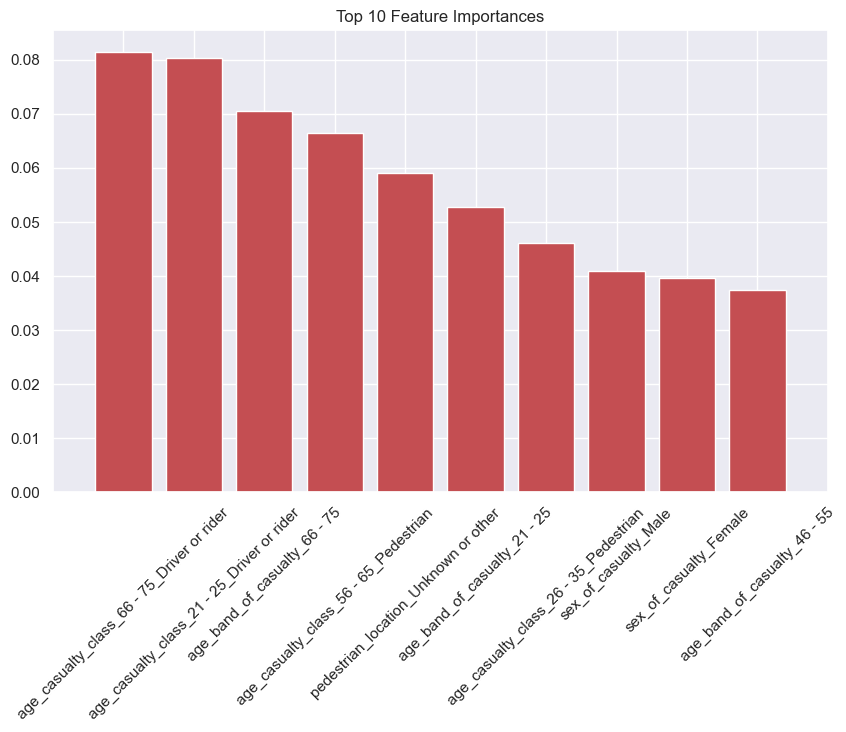

Refined Random Forest model saved successfully.


In [79]:
# Analyse feature importances
importances = best_rf_refined.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train_encoded.columns

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(10), importances[indices][:10], color="r", align="center")
plt.xticks(range(10), feature_names[indices][:10], rotation=45)
plt.xlim([-1, 10])
plt.show()

# Save the refined model to a file
dump(best_rf_refined, 'my_models/refined_rf.joblib')
print("Refined Random Forest model saved successfully.")


The bar chart shows that age and casualty class interactions (for example, “age_casualty_class 66–75 Driver or rider”) are among the most influential predictors of casualty severity. In other words, how age bands combine with casualty roles or locations strongly impacts the model’s decisions

### Comparing the Random Forest models

In [80]:
# Dictionary of models to compare
models = {
    'RF': best_rf,
    'RF- Expanded hyperparameter': best_rf_refined
}

# List to store results
results = []

# Loop through each model, predict on the test set, and calculate metrics
for name, model in models.items():
    y_pred = model.predict(X_test_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert the results into a DataFrame for easy comparison
comparison_df2 = pd.DataFrame(results)
print(comparison_df2)


                         Model  Accuracy  Precision    Recall  F1 Score
0                           RF  0.955296   0.954312  0.955296  0.954271
1  RF- Expanded hyperparameter  0.954325   0.953382  0.954325  0.953582


Both models perform very similarly, with the base Random Forest slightly outperforming the expanded version, though the differences are negligible. This indicates that the expanded hyperparameter tuning did not yield a significant improvement.

## 5. Conclusion

Overall, this analysis shows that the machine learning pipeline effectively predicts casualty severity, with ensemble and tree-based methods, particularly Random Forest, achieving around 95% accuracy. Through extensive hyperparameter tuning (GridSearchCV) and careful feature engineering, the models exhibit robust generalisation on unseen data, supported by consistent learning curves and minimal overfitting. Minor misclassifications persist, especially for serious casualties, suggesting that additional refinements or advanced ensembling strategies could further boost predictive accuracy.

Feature importance analysis highlights that age band and casualty class interactions are among the most influential predictors, shedding light on how demographic factors and casualty roles jointly impact severity. The Random Forest model delivers strong performance overall, but incorporating domain-specific enhancements or targeted techniques (like class weighting or SMOTE) may improve the detection of serious cases.

## 6. Possible Future Improvements and Business Scenarios for Model Implementation in real-world

**Future Improvements**:
In order to increase the detection of serious casualties, future model modifications could concentrate on more successfully addressing class imbalances, for example, by experimenting with methods like SMOTE or modifying class weights.  Furthermore, adding more domain-specific characteristics (such the time of day, road kinds, or weather) might improve forecast accuracy and offer richer context.  Performance improvements could also be obtained by investigating deep learning techniques and using sophisticated ensembling techniques like stacking or blending, especially when it comes to capturing intricate feature interactions. Continuous model monitoring and periodic retraining using new data will ensure that the system remains accurate as real-world conditions evolve.

**Business Scenarios**:
This model could be used as part of a proactive road safety management system, assisting transport agencies and local governments in identifying high-risk locations or circumstances that result in serious accidents. Emergency response teams may also use this data to better allocate resources, giving priority to areas with a higher risk of serious casualties. Stakeholders can improve public safety results, lower operating costs, and strengthen safety measures by connecting the model with real-time data inputs.

In [81]:
# Finish Timer
notebook_duration = round((time.time() - startnb)/60, 5)
print(f'The completion of the notebook took {notebook_duration} minutes.')

The completion of the notebook took 7.28261 minutes.


In [85]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [86]:
import io
from nbformat import read, NO_CONVERT
with io.open(NOTEBOOK_FULL_PATH.split("/")[-1], 'r', encoding='utf-8') as f:
 nb = read(f, NO_CONVERT)
word_count = 0
for cell in nb.cells:
 if cell.cell_type == "markdown":
     word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(f"Word count: {word_count}")

Word count: 1853


## References

Pekar, V. (2024). Big Data for Decision Making. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/vpekar/bd4dm